In [ ]:
!pip install pyyaml==5.3.1

In [ ]:
!pip install gdown

In [ ]:
!pip install mediapipe-model-maker

In [ ]:
import os
import random
import tensorflow as tf
from mediapipe_model_maker import gesture_recognizer
import shutil
import matplotlib.pyplot as plt

## Getting the labels and examples

22
['rocknroll', 'call', 'four', 'mute', 'paper', 'ok', 'rock', 'dislike', 'two_up', 'three2', 'three', 'one', 'two_up_inverted', 'stop', 'fist', 'scissors', 'palm', 'none', 'peace', 'peace_inverted', 'stop_inverted', 'like']


/tmp/ipykernel_28/3876410456.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))


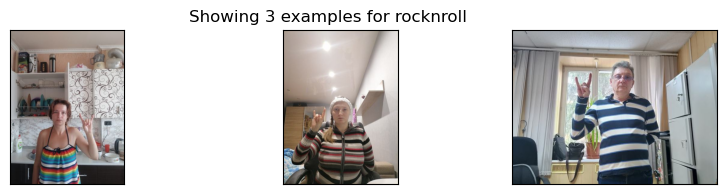

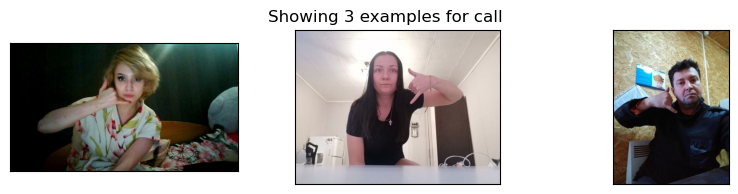

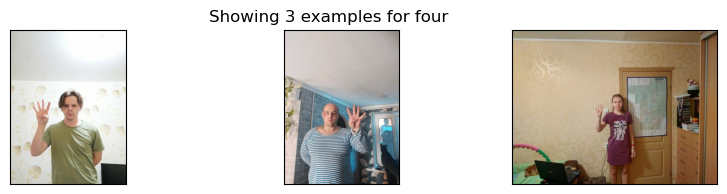

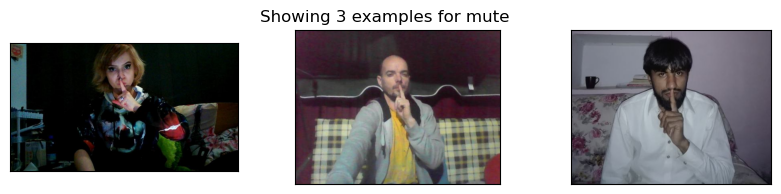

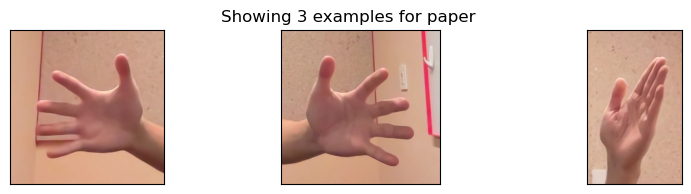

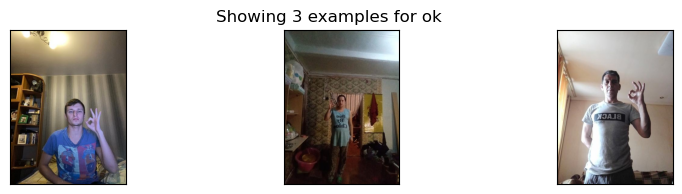

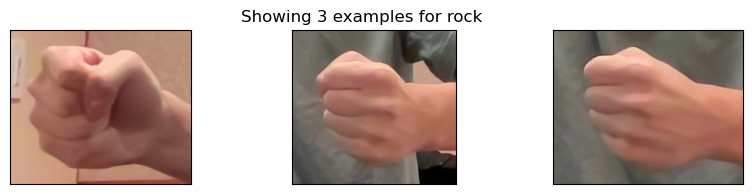

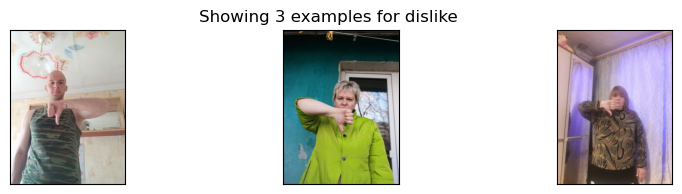

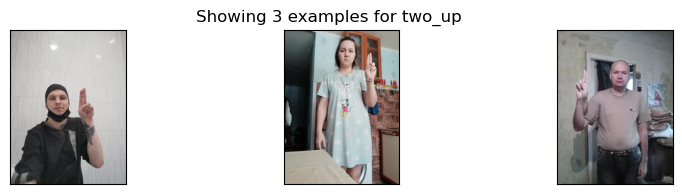

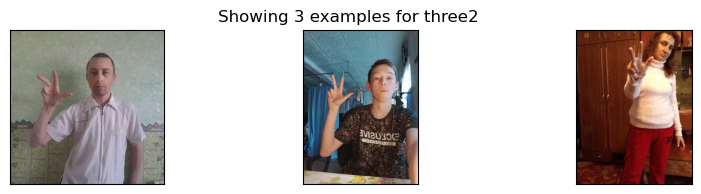

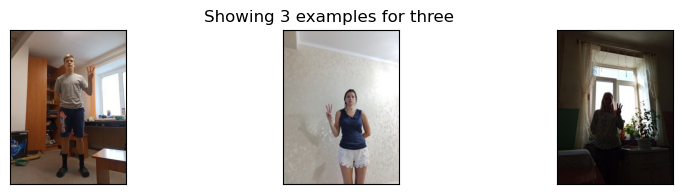

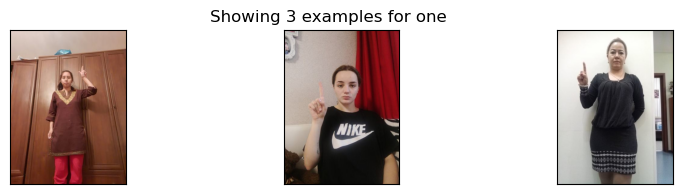

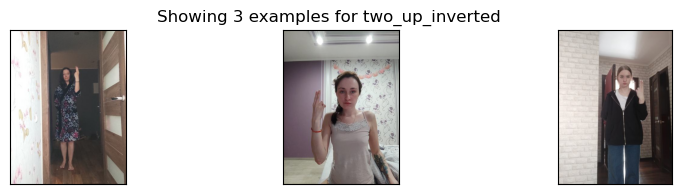

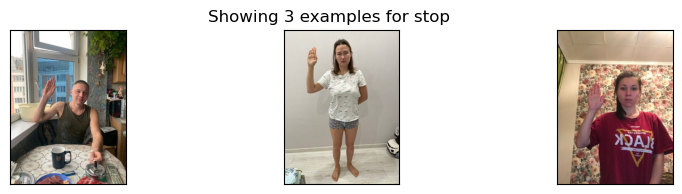

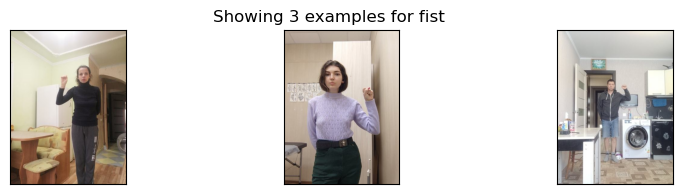

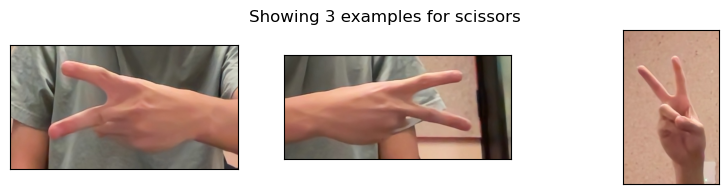

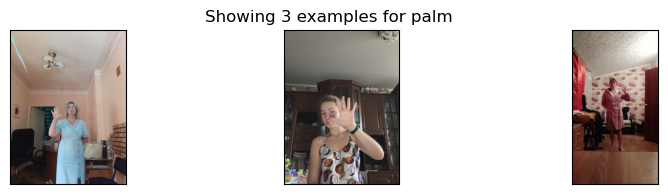

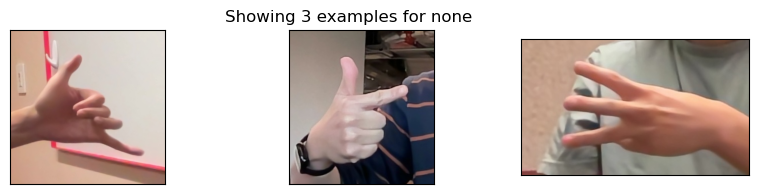

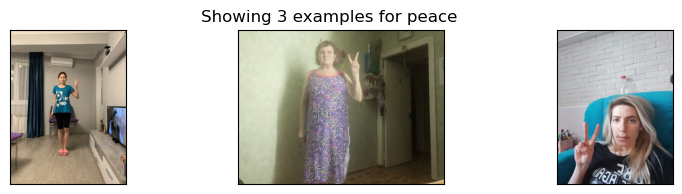

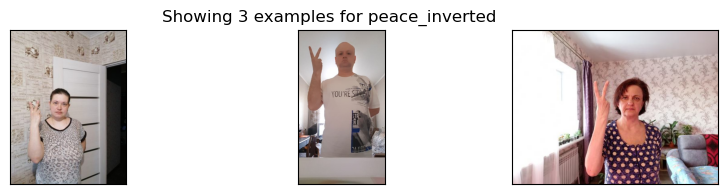

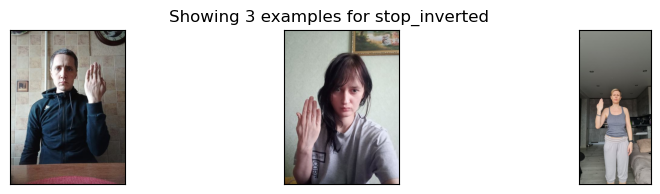

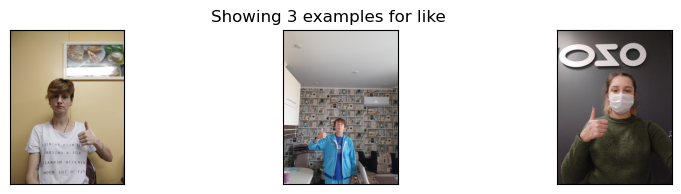

In [ ]:
dataset_path = "/kaggle/input/combined-handgesture-dataset/combined_handgesture_dataset"
labels = []
for i in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, i)):
        labels.append(i)
print(len(labels))
print(labels)

NUM_EXAMPLES = 3

for label in labels:
  label_dir = os.path.join(dataset_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Data Preprocessing

In [ ]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=dataset_path,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## Benchmark Model

In [ ]:
#benchmark model by the mediapipe team
hparams = gesture_recognizer.HParams(export_dir="baseline_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_o  (None, 22)               2838      
 ut (Dense)                                                      
                                                                 
Total params: 3,350
Trainable params: 3,094
Non-trainable par

In [ ]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

2776/2776 [==============================] - 89s 5ms/step - loss: 0.5311 - categorical_accuracy: 0.8347
Test loss:0.531060516834259, Test accuracy:0.8346541523933411


In [ ]:
model.export_model()


## Custom model_1

In [ ]:
hparams = gesture_recognizer.HParams(learning_rate=9.9000e-04,epochs= 25,batch_size= 16,
                                     shuffle = True, lr_decay = 0.99, export_dir="custom_model_1")

options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_o  (None, 22)               2838      
 ut (Dense)                                                      
                                                                 
Total params: 3,350
Trainable params: 3,094
Non-trainable p

In [ ]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

2776/2776 [==============================] - 91s 5ms/step - loss: 0.2941 - categorical_accuracy: 0.8815
Test loss:0.2940661609172821, Test accuracy:0.8814841508865356


**The accuracy is 88%**

In [ ]:
model.export_model()

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite


In [ ]:
hparams = gesture_recognizer.HParams(learning_rate=8.6006e-04,epochs= 25,batch_size= 8,
                                     shuffle = True, lr_decay = 0.99, export_dir="custom_model_2")

options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
custom_model_2 = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 re_lu_3 (ReLU)              (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_o  (None, 22)               2838      
 ut (Dense)                                                      
                                                                 
Total params: 3,350
Trainable params: 3,094
Non-trainable p

In [ ]:
loss, acc = custom_model_2.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

2776/2776 [==============================] - 91s 5ms/step - loss: 0.3072 - categorical_accuracy: 0.8775
Test loss:0.3071754574775696, Test accuracy:0.8775216341018677


**The accuracy is 87%**

In [ ]:
custom_model_2.export_model()

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
